In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/llm-human-preference-data-ultrafeedback/ultrafeedback_lmsysformat.parquet
/kaggle/input/llm-human-preference-data-ultrafeedback/ultrafeedback_ties.parquet
/kaggle/input/llm-human-preference-data-ultrafeedback/ultrafeedback.parquet
/kaggle/input/llm-human-preference-data-ultrafeedback/ultrafeedback.csv
/kaggle/input/llm-human-preference-data-ultrafeedback/ultrafeedback_ties.csv


In [2]:
import warnings
warnings.filterwarnings("ignore")

In [3]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('/kaggle/input/llm-human-preference-data-ultrafeedback/ultrafeedback.csv')
df.head()

,source,prompt,chosen,chosen-rating,chosen-model,rejected,rejected-rating,rejected-model
0,evol_instruct,Can you write a C++ program that prompts the u...,[{'content': 'Can you write a C++ program that...,5.00,starchat,[{'content': 'Can you write a C++ program that...,1.25,alpaca-7b
1,evol_instruct,Can you write a C++ program that prompts the u...,[{'content': 'Can you write a C++ program that...,5.00,starchat,[{'content': 'Can you write a C++ program that...,4.00,vicuna-33b
2,evol_instruct,Can you write a C++ program that prompts the u...,[{'content': 'Can you write a C++ program that...,5.00,starchat,[{'content': 'Can you write a C++ program that...,1.25,pythia-12b
3,evol_instruct,Suppose you are a content creator and want to ...,[{'content': 'Suppose you are a content creato...,4.75,gpt-4,[{'content': 'Suppose you are a content creato...,4.25,llama-2-13b-chat
4,evol_instruct,Suppose you are a content creator and want to ...,[{'content': 'Suppose you are a content creato...,4.75,gpt-4,[{'content': 'Suppose you are a content creato...,3.25,starchat


In [5]:
df.columns

Index(['source', 'prompt', 'chosen', 'chosen-rating', 'chosen-model',
       'rejected', 'rejected-rating', 'rejected-model'],
      dtype='object')

In [6]:
# Check missing values
print(df.isnull().sum())

source             0
prompt             0
chosen             0
chosen-rating      0
chosen-model       0
rejected           0
rejected-rating    0
rejected-model     0
dtype: int64


In [7]:
# Show column data types
print(df.dtypes)

source              object
prompt              object
chosen              object
chosen-rating      float64
chosen-model        object
rejected            object
rejected-rating    float64
rejected-model      object
dtype: object


In [8]:
# Create a label: 1 if 'chosen' rating is higher, else 0
df['label'] = (df['chosen-rating'] > df['rejected-rating']).astype(int)

# Features and label
X = df[['chosen-rating', 'rejected-rating']]
y = df['label']

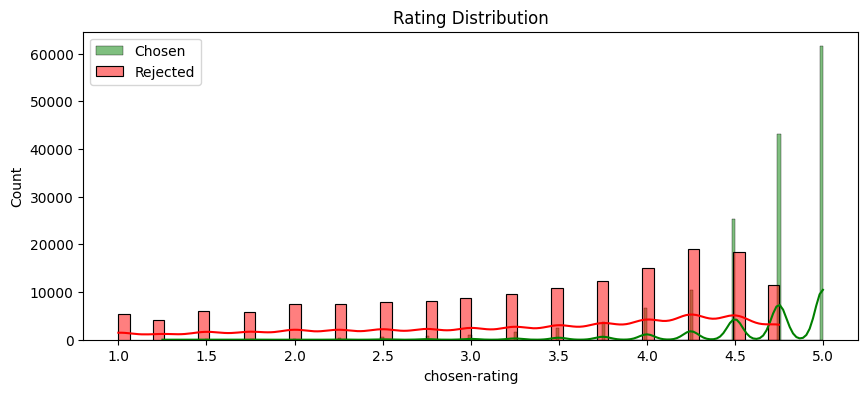

In [9]:
# Histogram of chosen vs rejected ratings
plt.figure(figsize=(10,4))
sns.histplot(df['chosen-rating'], color='green', label='Chosen', kde=True)
sns.histplot(df['rejected-rating'], color='red', label='Rejected', kde=True)
plt.legend(); plt.title('Rating Distribution'); plt.show()

In [10]:
from sklearn.model_selection import train_test_split

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [11]:
from lightgbm import LGBMClassifier
from sklearn.metrics import accuracy_score

# Train a LightGBM model
model = LGBMClassifier()
model.fit(X_train, y_train)

[LightGBM] [Warning] Contains only one class
[LightGBM] [Info] Number of positive: 0, number of negative: 126140
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002635 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 34
[LightGBM] [Info] Number of data points in the train set: 126140, number of used features: 2
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.000000 -> initscore=-34.538776
[LightGBM] [Info] Start training from score -34.538776
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because there are no more leaves that meet the split requirements
[LightGBM] [Warning] Stopped training because th

LGBMClassifier()

In [12]:
# Predict and check accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 1.0


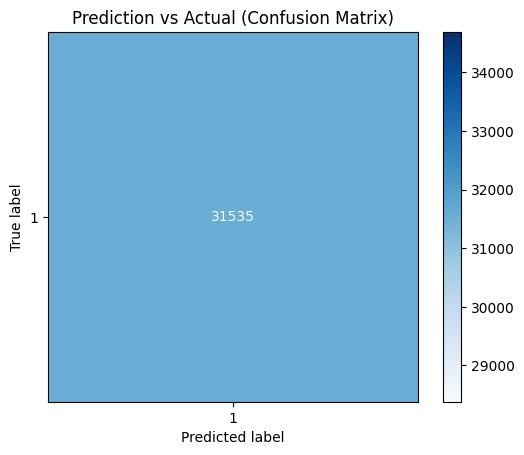

In [13]:
# Confusion matrix
from sklearn.metrics import ConfusionMatrixDisplay

ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Prediction vs Actual (Confusion Matrix)")
plt.show()